# Notebook summary

This jupyter notebook looks at general representation stats of tracks and artists in our 16 weeks of Spotify data and 6 years of Billboard Hot 100 data (Jan 2003 to Dec 2008). For each dataset, we calculate:
- the Gini coefficient
- concentration of the top 10%

In [67]:
from collections import deque
import pandas as pd
import numpy as np
import os, re
from datetime import date, timedelta
import matplotlib.pyplot as plt

from analysis_utils import get_num_appearances, get_all_entries, gini,\
    track_concentration_ratio

## Spotify data

### Calculating Gini coefficient
Tracks

In [17]:
df_all_spotify_track = get_all_entries('spotify_curated', ['track_name', 'track_id'])

In [3]:
temp = df_all_spotify_track.groupby(['track_id']).count().reset_index()
temp.columns = ['track_id', 'count']
appearances_count = temp[temp['count'] != 0]

In [4]:
appearances_temp = np.asarray(appearances_count['count'])
print('Gini coefficient for tracks in spotify curated is %f' % 
      gini(appearances_temp))

Gini coefficient for tracks in spotify curated is 0.487900


In [18]:
df_all_user_track = get_all_entries('user_curated', ['track_name', 'track_id'])

In [6]:
temp = df_all_user_track.groupby(['track_id']).count().reset_index()
temp.columns = ['track_id', 'count']
appearances_count = temp[temp['count'] != 0]

In [7]:
appearances_temp = np.asarray(appearances_count['count'])
print('Gini coefficient for tracks in user curated is %f' % 
      gini(appearances_temp))

Gini coefficient for tracks in user curated is 0.480086


Artists

In [19]:
df_all_spotify_artist = get_all_entries('spotify_curated', ['artist', 'artist_id'])

In [9]:
temp = df_all_spotify_artist.groupby(['artist_id']).count().reset_index()
temp.columns = ['artist_id', 'count']
appearances_count = temp[temp['count'] != 0]

In [10]:
appearances_temp = np.asarray(appearances_count['count'])
print('Gini coefficient for artists in spotify curated is %f' % 
      gini(appearances_temp))

Gini coefficient for artists in spotify curated is 0.611535


In [20]:
df_all_user_artist = get_all_entries('user_curated', ['artist', 'artist_id'])

In [12]:
temp = df_all_user_artist.groupby(['artist_id']).count().reset_index()
temp.columns = ['artist_id', 'count']
appearances_count = temp[temp['count'] != 0]

In [13]:
appearances_temp = np.asarray(appearances_count['count'])
print('Gini coefficient for artists in user curated is %f' % 
      gini(appearances_temp))

Gini coefficient for artists in user curated is 0.641565


### Concentration of top 10%

Tracks

In [26]:
df_all = pd.concat([df_all_spotify_track, df_all_user_track])
df_all_sorted = df_all.groupby(['track_id']).count()\
                .reset_index()\
                .sort_values(by='track_name', ascending=False)

In [50]:
# get top 10%, then calculate the concentration of top 10%
top_10_num = int(len(df_all_sorted)/10)
df_top_10 = df_all_sorted.iloc[:top_10_num, :]

top_10_entries = df_top_10.merge(df_all, on=['track_id'], how='left')
top_10_conc = len(top_10_entries) / len(df_all)
print('The concentration of the top 10 percent of tracks is %f of entries' % 
      top_10_conc)

The concentration of the top 10 percent of tracks is 0.359554 of entries


In [53]:
# repeat calculations with more granularity (i.e. on a per playlist type)
# spotify curated
df_all_spotify_track_sorted = df_all_spotify_track.groupby(['track_id']).count()\
                            .reset_index()\
                            .sort_values(by='track_name', ascending=False)
top_10_num_spotify_track = int(len(df_all_spotify_track_sorted)/10)
df_top_10_spotify_track = df_all_spotify_track_sorted.iloc[:top_10_num_spotify_track, :]

top_10_entries_spotify_track = df_top_10_spotify_track.merge(df_all_spotify_track, on=['track_id'], how='left')
top_10_conc_spotify_track = len(top_10_entries_spotify_track) / len(df_all_spotify_track)

# user curated
df_all_user_track_sorted = df_all_user_track.groupby(['track_id']).count()\
                            .reset_index()\
                            .sort_values(by='track_name', ascending=False)
top_10_num_user_track = int(len(df_all_user_track_sorted)/10)
df_top_10_user_track = df_all_user_track_sorted.iloc[:top_10_num_user_track, :]

top_10_entries_user_track = df_top_10_user_track.merge(df_all_user_track, on=['track_id'], how='left')
top_10_conc_user_track = len(top_10_entries_user_track) / len(df_all_user_track)

print('The concentration of the top 10 percent of SCL tracks is %f of the SCL entries' % 
      top_10_conc_spotify_track)
print('The concentration of the top 10 percent of UCL tracks is %f of UCL entries' % 
      top_10_conc_user_track)

The concentration of the top 10 percent of SCL tracks is 0.301137 of the SCL entries
The concentration of the top 10 percent of UCL tracks is 0.334740 of UCL entries


Artists

In [56]:
df_all = pd.concat([df_all_spotify_artist, df_all_user_artist])
df_all_sorted = df_all.groupby(['artist_id']).count()\
                .reset_index()\
                .sort_values(by='artist', ascending=False)

In [57]:
# get top 10%, then calculate the concentration of top 10%
top_10_num = int(len(df_all_sorted)/10)
df_top_10 = df_all_sorted.iloc[:top_10_num, :]

top_10_entries = df_top_10.merge(df_all, on=['artist_id'], how='left')
top_10_conc = len(top_10_entries) / len(df_all)
print('The concentration of the top 10 percent of artists is %f of entries' % 
      top_10_conc)

The concentration of the top 10 percent of artists is 0.546666 of entries


In [58]:
# repeat calculations with more granularity (i.e. on a per playlist type)
# spotify curated
df_all_spotify_artist_sorted = df_all_spotify_artist.groupby(['artist_id']).count()\
                            .reset_index()\
                            .sort_values(by='artist', ascending=False)
top_10_num_spotify_artist = int(len(df_all_spotify_artist_sorted)/10)
df_top_10_spotify_artist = df_all_spotify_artist_sorted.iloc[:top_10_num_spotify_artist, :]

top_10_entries_spotify_artist = df_top_10_spotify_artist.merge(df_all_spotify_artist, on=['artist_id'], how='left')
top_10_conc_spotify_artist = len(top_10_entries_spotify_artist) / len(df_all_spotify_artist)

# user curated
df_all_user_artist_sorted = df_all_user_artist.groupby(['artist_id']).count()\
                            .reset_index()\
                            .sort_values(by='artist', ascending=False)
top_10_num_user_artist = int(len(df_all_user_artist_sorted)/10)
df_top_10_user_artist = df_all_user_artist_sorted.iloc[:top_10_num_user_artist, :]

top_10_entries_user_artist = df_top_10_user_artist.merge(df_all_user_artist, on=['artist_id'], how='left')
top_10_conc_user_artist = len(top_10_entries_user_artist) / len(df_all_user_artist)

print('The concentration of the top 10 percent of SCL artists is %f of the SCL entries' % 
      top_10_conc_spotify_artist)
print('The concentration of the top 10 percent of UCL artists is %f of the UCL entries' % 
      top_10_conc_user_artist)

The concentration of the top 10 percent of SCL artists is 0.475332 of the SCL entries
The concentration of the top 10 percent of UCL artists is 0.521585 of UCL entries


### Billboard data

Start by getting all the entries in our 5 years of data.

In [60]:
all_entries = []

for file in os.listdir('../billboard_data'):
    if file == 'sc': continue
    file_path = '../billboard_data/' + file
    df_temp = pd.read_csv(file_path)
    all_entries.append(df_temp)
    
df_all = pd.concat(all_entries)
df_all = df_all.iloc[:, 1:]

print('Our 5 years of Billboard data has a total of %d entries'%(len(df_all)))
print('Our 5 years of Billboard data has a total of %d unique artists'%(len(df_all.drop_duplicates('artist'))))
print('Our 5 years of Billboard data has a total of %d unique tracks'%(len(df_all.drop_duplicates('track'))))

Our 5 years of Billboard data has a total of 31300 entries
Our 5 years of Billboard data has a total of 1158 unique artists
Our 5 years of Billboard data has a total of 2101 unique tracks


Loop through Billboard data and calculate gini coefficient for each 16-week window.

In [97]:
def get_gini_for_billboard_range(df, column):
    temp = df.groupby([column]).count()\
            .reset_index()\
            .iloc[:, 0:2]
    temp.columns = [column, 'count']
    appearances_count = temp[temp['count'] != 0]
    appearances_temp = np.asarray(appearances_count['count'])
    return gini(appearances_temp)

In [107]:
df_queue = deque()
track_ginis = []
artist_ginis = []

current_week = date(2003, 1, 4)
data_dir = '../billboard_data/'

while current_week <= date(2008, 12, 17):
    full_path = data_dir + str(current_week) + '.csv'
    df_queue.append(pd.read_csv(full_path))
    
    # check if window is big enough
    if len(df_queue) == 16:
        df_temp = pd.concat(df_queue)
        track_ginis.append(get_gini_for_billboard_range(df_temp, 'track'))
        artist_ginis.append(get_gini_for_billboard_range(df_temp, 'artist'))
        
        df_queue.popleft()
    
    current_week = current_week + timedelta(days=7)

Text(0, 0.5, 'gini coeff')

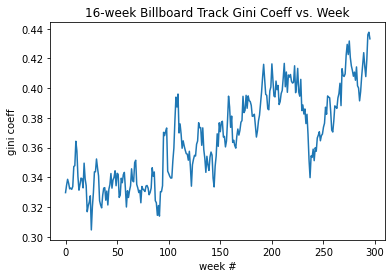

In [110]:
plt.title('16-week Billboard Track Gini Coeff vs. Week')
plt.plot(track_ginis)
plt.xlabel('week #')
plt.ylabel('gini coeff')

Text(0, 0.5, 'gini coeff')

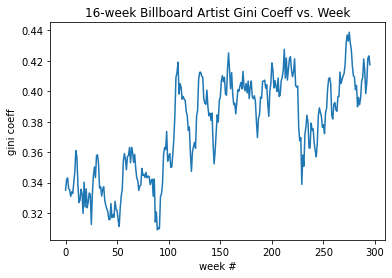

In [111]:
plt.title('16-week Billboard Artist Gini Coeff vs. Week')
plt.plot(artist_ginis)
plt.xlabel('week #')
plt.ylabel('gini coeff')

### Concentration of top 10%

#### Tracks

In [23]:
df_all_sorted = df_all.groupby(['track']).count()\
                .reset_index()\
                .sort_values(by='artist', ascending=False)

In [26]:
# get top 10%, then calculate the concentration of top 10%
top_10_num = int(len(df_all_sorted)/10)
top_10_df_all = df_all_sorted.iloc[:top_10_num, :]

top_10_conc = top_10_df_all['artist'].sum() / df_all_sorted['artist'].sum()
print('The concentration of the top 10 percent of tracks is %f' % 
      top_10_conc)

The concentration of the top 10 percent of tracks is 0.238850


#### Artists

In [27]:
df_all_sorted = df_all.groupby(['artist']).count()\
                .reset_index()\
                .sort_values(by='track', ascending=False)

In [28]:
# get top 10%, then calculate the concentration of top 10%
top_10_num = int(len(df_all_sorted)/10)
top_10_df_all = df_all_sorted.iloc[:top_10_num, :]

top_10_conc = top_10_df_all['track'].sum() / df_all_sorted['track'].sum()
print('The concentration of the top 10 percent of artists is %f' % 
      top_10_conc)

The concentration of the top 10 percent of artists is 0.432971
